## DCT via FFT

Reference: https://dsp.stackexchange.com/questions/2807/fast-cosine-transform-via-fft/10606

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
%matplotlib inline

N = 40
y1 = np.arange(80,80+40)
y2 = np.append(np.arange(80,80+40), np.zeros(24))
y1, y2

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]))

In [77]:
# DCT
dcted1 = dct(y1).astype(int)
dcted2 = dct(y2).astype(int)
dcted1, dcted2

(array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
          -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
           0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]),
 array([ 7960,  3351, -2076,  -628,  1167,  -437,  -582,   635,   -25,
         -510,   345,   158,  -417,   145,   243,  -311,     0,   268,
         -201,  -101,   251,   -96,  -164,   205,    -2,  -192,   141,
           72,  -189,    69,   124,  -161,     0,   151,  -115,   -60,
          154,   -58,  -105,   134,     0,  -130,    98,    51,  -135,
           51,    93,  -121,     0,   118,   -90,   -48,   124,   -47,
          -87,   113,     0,  -112,    85,    45,  -120,    45,    84,
         -110]))

In [71]:
# DCT via FFT
yy = np.zeros(2*N)
yy[:N] = y
yy[N:] = y[::-1]
k = np.arange(N)
Y = fft(yy)[:N]
Y

array([ 7.96000000e+03+0.00000000e+00j, -6.47789011e+02-2.54516996e+01j,
        6.57787042e-14-1.44890305e-13j, -7.13848801e+01-8.44895734e+00j,
        5.09965159e-14-1.18510956e-14j, -2.52741424e+01-5.02733949e+00j,
       -1.73192805e-14-3.65096685e-14j, -1.25722193e+01-3.54573254e+00j,
       -1.94748663e-15-4.95927925e-14j, -7.34745325e+00-2.71061861e+00j,
        0.00000000e+00-0.00000000e+00j, -4.70528845e+00-2.16916769e+00j,
        1.67829082e-14-1.12504351e-14j, -3.18846909e+00-1.78562848e+00j,
        1.99995049e-14+1.46689607e-14j, -2.23982881e+00-1.49660576e+00j,
       -2.57950790e-15-1.61430684e-14j, -1.60907691e+00-1.26849395e+00j,
       -4.40079524e-16-2.55154201e-14j, -1.17027805e+00-1.08179391e+00j,
        0.00000000e+00+0.00000000e+00j, -8.54497781e-01-9.24390492e-01j,
        2.13000157e-14+6.65669543e-16j, -6.21474334e-01-7.88336435e-01j,
       -4.95373255e-15+3.93234608e-14j, -4.46462692e-01-6.68178638e-01j,
        4.04472893e-14-9.74376435e-15j, -3.13630138

In [68]:
Y = Y * (np.cos(-1*np.pi*k/(2*N)) + 1j * np.sin(-1*np.pi*k/(2*N)))
Y = Y.real
DCTED = Y.astype(int)
y, yy, DCTED, DCTED == dcted

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119., 119., 118., 117., 116.,
        115., 114., 113., 112., 111., 110., 109., 108., 107., 106., 105.,
        104., 103., 102., 101., 100.,  99.,  98.,  97.,  96.,  95.,  94.,
         93.,  92.,  91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,
         82.,  81.,  80.]),
 array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
          -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
           0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0

## Mel scale

In [143]:
f = np.linspace(0, 22000, N)

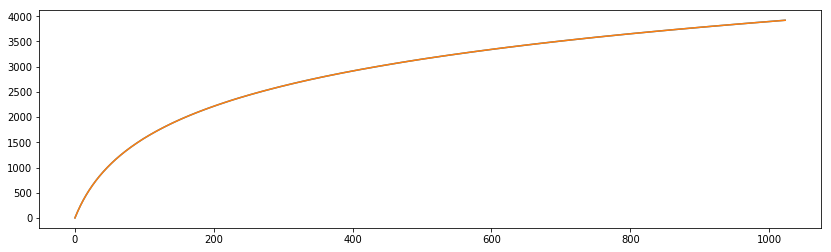

In [145]:
logten2 = np.log10(2)
import math

c = [1.23149591368684, -4.11852516267426, 6.02197014179219, -3.13396450166353]
def log10_approx(x):
    f, e = math.frexp(x)
    return logten2 * (c[0]*f**3 + c[1]*f**2 + c[2]*f + c[3] + e)

log10_approx_ = np.vectorize(log10_approx)

plt.figure(figsize=[14,4])
plt.plot(2595 * log10_approx_(1 + f/700))
plt.plot(2595 * np.log10(1 + f/700))